In [1]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from umap import UMAP

tex_fonts = {
    "text.usetex": True,
    "font.family": "sans-serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

# sns.set_theme(context="paper", style="ticks", rc=tex_fonts)

Download: https://www.bpb.de/politik/wahlen/wahl-o-mat/332469/download


Datei Lesen und in Parteien und Thesen trennen


In [2]:
datensatz = pd.read_csv("wahlomat_datensatz.csv")
datensatz = pd.read_csv("Wahl-O-Mat Europa 2024_Datensatz_v1.01.csv")
datensatz = datensatz.replace({"stimme zu": 1, "neutral": 0, "stimme nicht zu": -1})

thesen = datensatz.pivot(
    index="Partei: Kurzbezeichnung", columns="These: Titel", values="Position: Position"
)

parteien = datensatz.pivot(
    index="These: Titel", columns="Partei: Kurzbezeichnung", values="Position: Position"
)

C:\Users\Sandro\AppData\Local\Temp\ipykernel_16308\1817405464.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datensatz = datensatz.replace({"stimme zu": 1, "neutral": 0, "stimme nicht zu": -1})


### Korrelationen finden


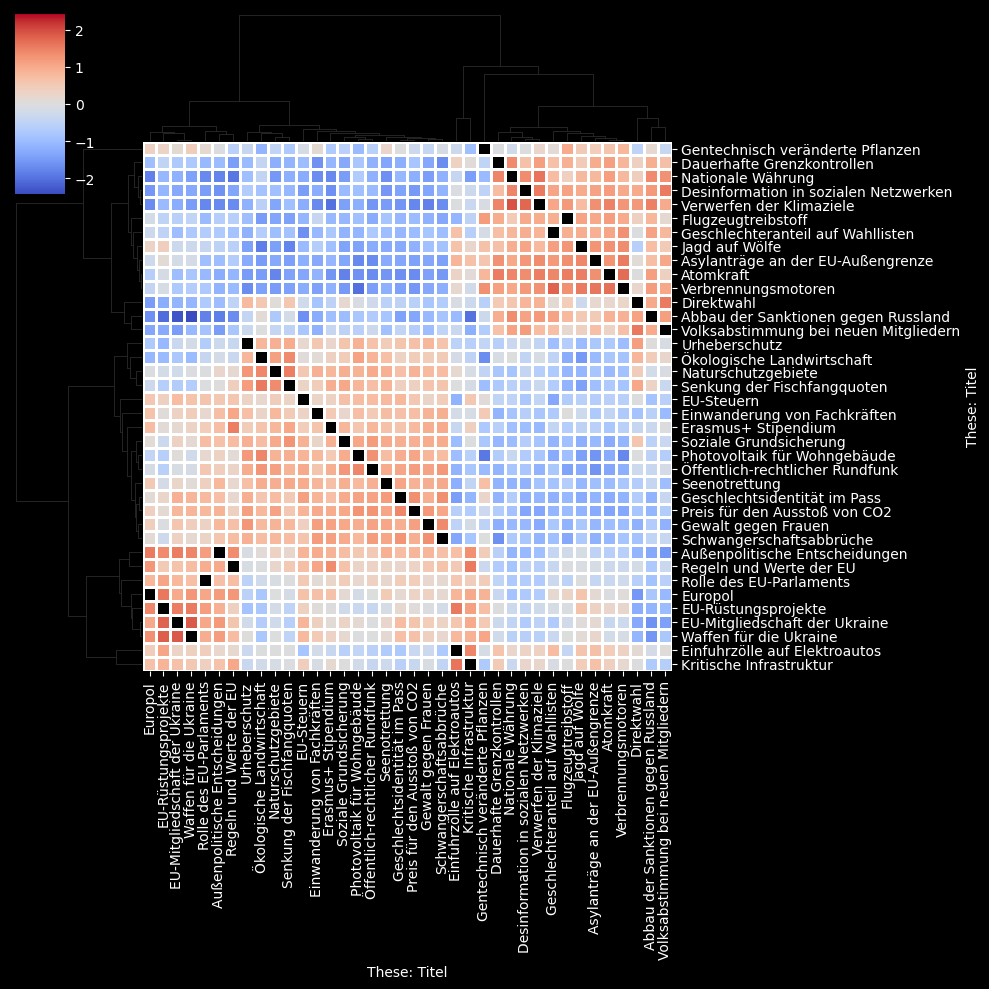

In [3]:
mask = np.identity(38)

sns.clustermap(
    data=thesen.corr(),
    metric="correlation",
    linewidths=1,
    # method="average",
    cmap="coolwarm",
    row_cluster=True,
    z_score=1,
    mask=mask,
    norm=colors.CenteredNorm(),
)

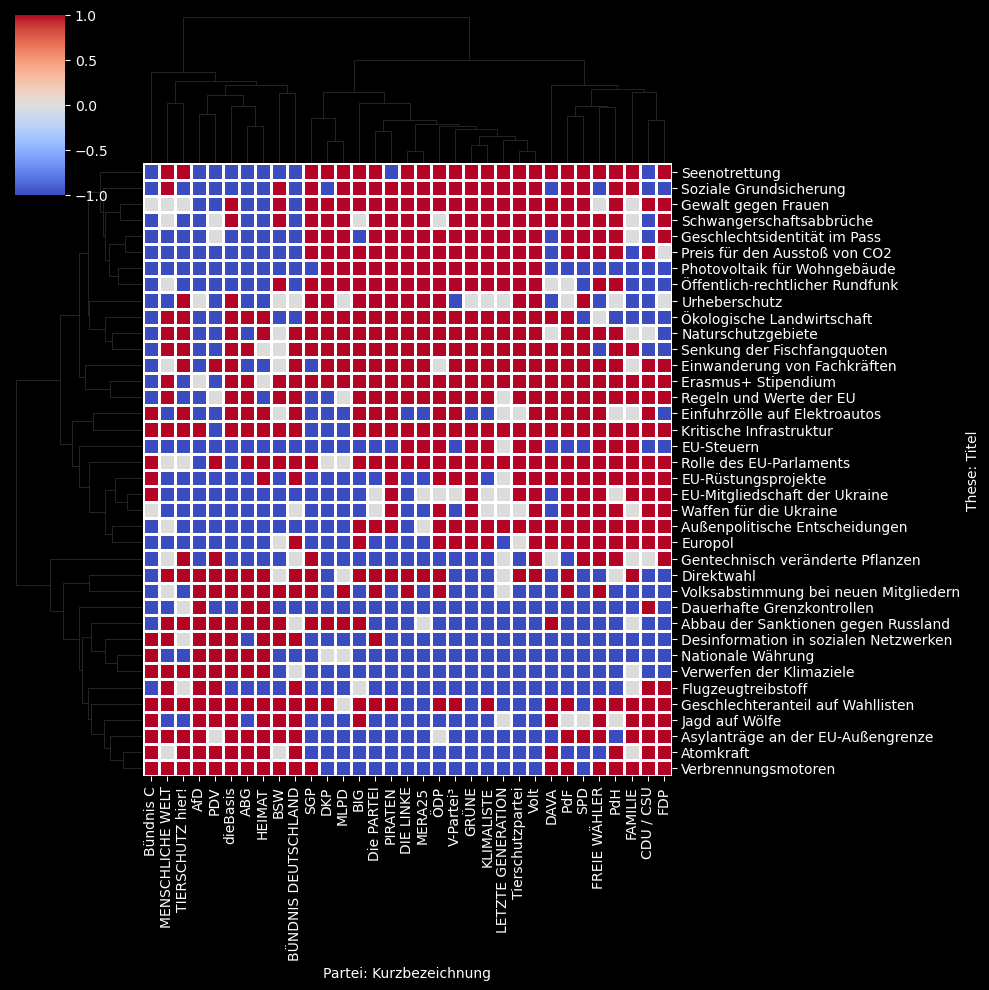

In [13]:
mask = np.identity(33)

sns.clustermap(
    data=parteien.drop(
        "Partei für schulmedizinische Verjüngungsforschung", axis=1
    ),  # .corr(),
    metric="correlation",
    cmap="coolwarm",
    # z_score=1,
    # standard_scale=1,
    linewidths=1,
    norm=colors.CenteredNorm(),
    # mask=mask,
)

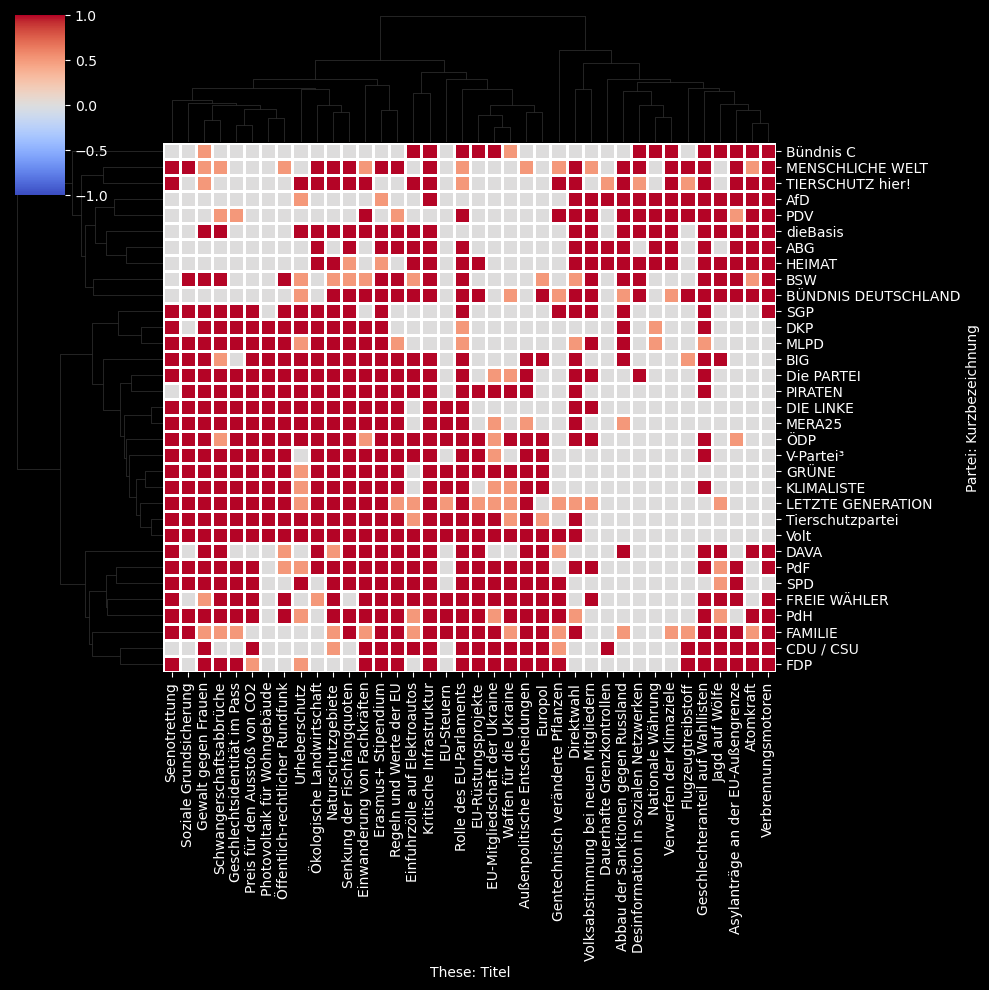

In [16]:
mask = np.identity(33)

sns.clustermap(
    data=thesen.drop(
        "Partei für schulmedizinische Verjüngungsforschung", axis=0
    ),  # .corr(),
    metric="correlation",
    cmap="coolwarm",
    # z_score=0,
    standard_scale=1,
    linewidths=1,
    norm=colors.CenteredNorm(),
    # mask=mask,
)

### Ergebnisse:

- Eindeutige Trennung in zwei Cluster (sowohl Parteien als auch Thesen)
- Links-Rechts-Ausrichtung der Parteien entspricht der zu erwartenden Reihenfolge


### Darstellung in 2D


In [6]:
partei_ordnung = {
    "DIE LINKE": 0,
    "SPD": 2,
    "Grüne": 3,
    "CDU / CSU": 5,
    "FDP": 4,
    "AfD": 6,
    "NPD": 7,
}

partien_y = pd.Series(partei_ordnung, index=thesen.index).fillna(3.5)

In [7]:
reducer = UMAP(
    densmap=True,
    metric="cosine",
    n_components=5,
    n_neighbors=10,
    target_metric="l2",
    local_connectivity=2,
)

embedding = reducer.fit_transform(X=thesen, y=partien_y)

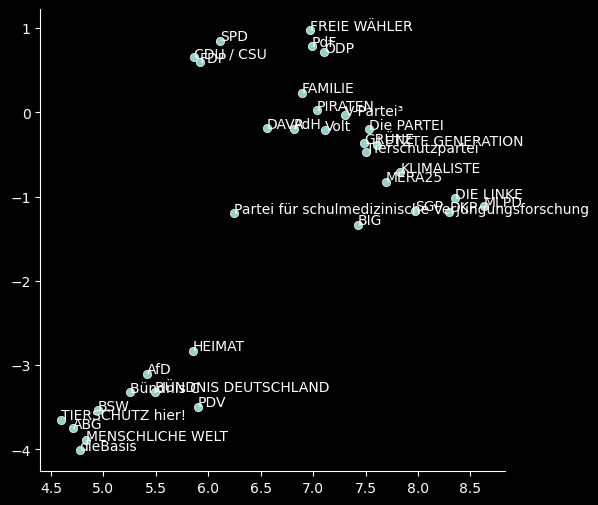

In [8]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
)

sns.despine()

for i in range(parteien.columns.shape[0]):
    plt.text(
        x=embedding[i, 0],  # +np.random.default_rng().random()/10,
        y=embedding[i, 1],  # +np.random.default_rng().random()/10,
        s=parteien.columns[i],
    )

UMAP kann drei Cluster ausmachen:

1. Sozialdemokratisch/Grün/kommunistisch
2. Liberal/Rechtskonservativ
3. Rechtsextrem
